### Importing libraries

In [1]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import src.get_data.get_data as getData

In [40]:
import src.ia_model.ia as ia

### Data loading and preprocessing (1/2)

In [5]:
gd = getData.GetData()

In [6]:
df = gd.get_data()
df.head()

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number),...,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812


In [7]:
df = gd.rename_colums_data(df)
df

,Entity,Code,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alcohol use,Diet low in fruits,Unsafe water source,...,High body-mass index,Unsafe sanitation,No access to handwashing facility,Drug use,Low bone mineral density,Vitamin A deficiency,Child stunting,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261


In [8]:
df = gd.drop_columns_data(df)
df

,Entity,Year,Air pollution
0,Afghanistan,1990,37231
1,Afghanistan,1991,38315
2,Afghanistan,1992,41172
3,Afghanistan,1993,44488
4,Afghanistan,1994,46634
...,...,...,...
6835,Zimbabwe,2015,13246
6836,Zimbabwe,2016,13131
6837,Zimbabwe,2017,12926
6838,Zimbabwe,2018,12745


In [9]:
df_brazil = gd.filter_data(df, 'Brazil')
df_brazil

,Entity,Year,Air pollution
780,Brazil,1990,86653
781,Brazil,1991,82606
782,Brazil,1992,80515
783,Brazil,1993,79970
784,Brazil,1994,77697
785,Brazil,1995,75808
786,Brazil,1996,74643
787,Brazil,1997,72801
788,Brazil,1998,72541
789,Brazil,1999,71693


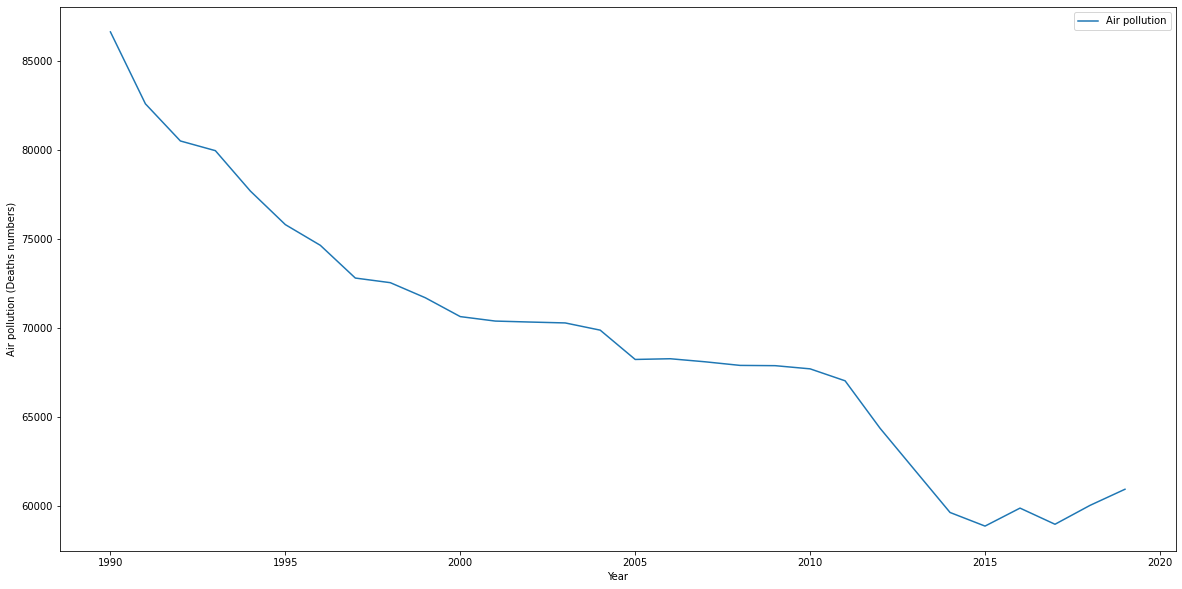

In [10]:
brazil = df_brazil.set_index(['Year'])

brazil.plot(ylabel = 'Air pollution (Deaths numbers)', figsize = (20,10))
plt.show()

### Data loading and preprocessing (2/2)

In [96]:
x_br = df_brazil[['Year']]
y_br = df_brazil[['Air pollution']]

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x_br, y_br, test_size=0.3, shuffle=False)

Ai model - Linear Regression

In [101]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [102]:
air_pollution_y_pred = reg.predict(x_test)

In [103]:
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred))

Coefficients: 
 [[-822.64805195]]
Mean squared error: 3664021.14
Coefficient of determination: 0.46


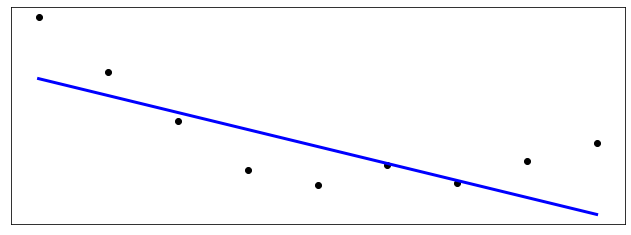

In [108]:
x_test_points = x_test.values.tolist()
y_test_points = y_test.values.tolist()

# Plot outputs
plt.scatter(x_test_points, y_test_points, color="black")
plt.plot(x_test_points, air_pollution_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [119]:
x_br_future = np.array([[2020]])
x_br_future.T

array([[2020]])

In [121]:
y_br_predict = reg.predict(x_br_future)

In [122]:
y_br_predict

array([[56614.70562771]])

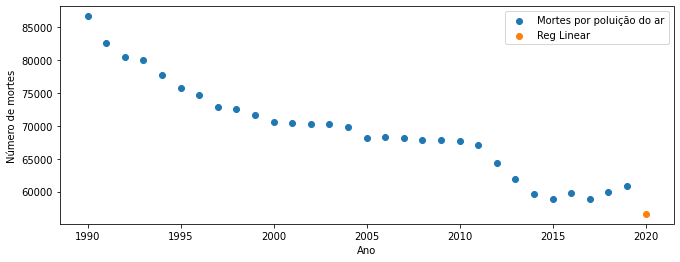

In [123]:
x_points = x_br.values.tolist()
y_points = y_br.values.tolist()

plt.scatter(x_points, y_points, label="Mortes por poluição do ar")
plt.scatter(x_br_future, y_br_predict, label= "Reg Linear")
plt.xlabel("Ano")
plt.ylabel("Número de mortes")
plt.legend()

Ai model - Ridge Regression